# Script to explore the car profiles


In [2]:
import json
import  gzip
import pickle
REPO_PATH = "THIS_REPO_PATH"
json_files = REPO_PATH + "\data\processed\model_data_car_cs.json"
with open(json_files, 'r') as f:
  cars_json = json.load(f)

cars = cars_json["car"]
car_0 = cars[0]
car_0 = car_0["file_emobpy"]
pickle_file_path = car_0
pickle_off = gzip.open(pickle_file_path, "rb")
emobpy = pickle.load(pickle_off)
pickle_off.close()
t = 3250.25
data = emobpy["profile"]
data[data["hh"]==t]["soc"]


13001    1.0
Name: soc, dtype: float64

In [ ]:
import pandas as pd

data_car = pd.DataFrame()
data_car_soc= pd.DataFrame()
for i,car in enumerate(cars):
    pickle_file_path = car["file_emobpy"]
    pickle_off = gzip.open(pickle_file_path, "rb")
    emobpy = pickle.load(pickle_off)
    pickle_off.close()
    data = emobpy["profile"]

    charg_point = data["charging_point"]
    charg_cap = data["charging_cap"]
    charg_soc = data["soc"]
    total_load = [0]*len(charg_cap)
    # if charging point is home and soc <1, then load with charging_cap
    for x in range(0, len(charg_cap)):
        if charg_point[x] == "home" and charg_soc[x] < 1:
            total_load[x] = charg_cap[x]
    data_car[f"car_{i}"] = total_load
    data_car_soc[f"car_{i}"] = charg_soc

START = "2019-01-01 00:00:00"
END = "2019-12-31 23:45:00"
dti = pd.date_range(start=START, end=END, freq="15T")
steps = len(dti)
data_car_kw = data_car.head(steps)
data_car_kw["Time"] = dti
data_car_kw.set_index("Time", inplace=True)

data_car_soc = data_car_soc.head(steps)
data_car_soc["Time"] = dti
data_car_soc.set_index("Time", inplace=True)


In [ ]:
# Find points with maximum concurrent load

df2 = data_car_kw.sum(axis=1)
df2[96:].plot(figsize=(12,6))

<AxesSubplot:xlabel='Time'>

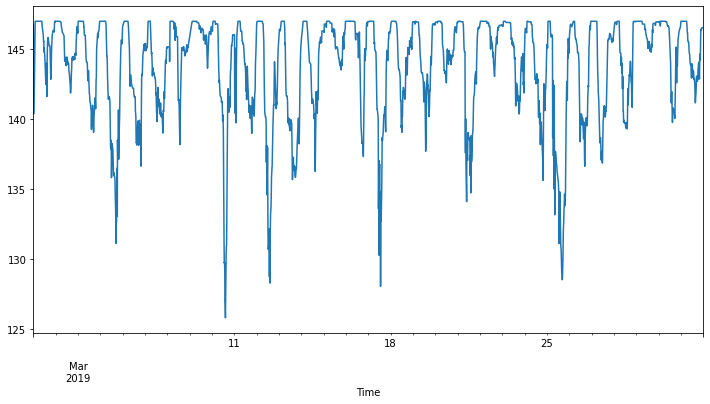

In [14]:
#Explore a subset with the highest concurrent loads
df2 = data_car_soc.sum(axis=1)
df2[96*60:96*90].plot(figsize=(12,6))